<a href="https://colab.research.google.com/github/Utomi-Tom/Movie-Binary-classification/blob/main/IMBD_movie_classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction on the IMDB review project
The IMDB dataset consist of: a set of 50,000 highly polarized reviews from the
Internet Movie Database. They’re split into 25,000 reviews for training and 25,000
reviews for testing, each set consisting of 50% negative and 50% positive reviews.


Just like the MNIST dataset, the IMDB dataset comes packaged with Keras. It has
already been preprocessed: the reviews (sequences of words) have been turned into
sequences of integers, where each integer stands for a specific word in a dictionary.

# Importing library


The following code will load the dataset (when you run it the first time, about
80 MB of data will be downloaded to your machine).

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Import dataset 
(x_tr, y_tr), (x_tt, y_tt) = keras.datasets.imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 1s 0us/step


The argument *num_words* =10000 means you’ll only keep the top 10,000 most frequently
occurring words in the training data. Rare words will be discarded. This allows
you to work with vector data of manageable size.

In [3]:
word_index = keras.datasets.imdb.get_word_index()

1641221/1641221 [==============================] - 0s 0us/step


Above code is how I quickly decode one of these reviews back to English
words:


*get_word_index* is a dictionary, mapping
words to an integer index.

In [4]:
r_word_ind = dict([(value, key) for (key, value) in word_index.items()])

The above code reverses the mapping process, by mapping
integer indices to words.

In [5]:
decoded_review = "".join([r_word_ind.get(i - 3, "?") for i in x_tr[3]])

In [6]:
decoded_review


"?the??atstorytellingthetraditionalsortmanyyearsaftertheeventicanstillseeinmy?eyeanelderlyladymyfriend'smotherretellingthebattleof?shemakesthecharacterscomealiveherpassionisthatofaneyewitnessonetotheeventsonthe?heathamileorsofromwhereshelivesbrbrofcourseithappenedmanyyearsbeforeshewasbornbutyouwouldn'tguessfromthewayshetellsitthesamestoryistoldinbarsthelengthand?ofscotlandasidiscusseditwithafriendonenightin?alocalcutintogivehisversionthediscussioncontinuedtoclosingtimebrbrstoriespasseddownlikethisbecomepartofourbeingwhodoesn'trememberthestoriesourparentstolduswhenwewerechildrentheybecomeourinvisibleworldandaswegrowoldertheymaybestillserveasinspirationorasanemotional?factandfictionblendwith?rolemodelswarningstories?magicandmysterybrbrmynameis?likemygrandfatherandhisgrandfatherbeforehimourprotagonistintroduceshimselftousandalsointroducesthestorythatstretchesbackthroughgenerationsitproducesstorieswithinstoriesstoriesthatevokethe?wonderofscotlanditsruggedmountains?in?thestuffoflegendyet?is

The variables **x_tr and x_tt** are lists of reviews; each review is a list of
word indices (encoding a sequence of words).**y_tr and y_tt** are
lists of 0s and 1s, where 0 stands for negative and 1 stands for positive:

# Preparing the data

Because I cannot feed lists of integers into a neural network. I need to turn your lists into tensors and there are two ways to do that.


*  Pad your lists so that they all have the same length, turn them into an integer
tensor of shape (samples, word_indices), and then use as the first layer in
your network a layer capable of handling such integer tensors. 
*  One-hot encode your lists to turn them into vectors of 0s and 1s. This would
mean, for instance, turning the sequence [3, 5] into a 10,000-dimensional vector
that would be all 0s except for indices 3 and 5, which would be 1s. Then you
could use as the first layer in your network a Dense layer, capable of handling
floating-point vector data.



Let’s go with the latter solution to vectorize the data, which you’ll do manually for
maximum clarity.


In [11]:
# Encoding the integer sequences into a binary matrix

def vectorize_seq (sequence, dim= 10000):
  results = np.zeros((len(sequence), dim))
  for i, sequence in enumerate(sequence):
    results[i, sequence] = 1
  return results

In [12]:
train_data = vectorize_seq(x_tr)
print(train_data
      )

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


In [13]:
test_data = vectorize_seq(x_tt)
print(test_data
      )

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


In [14]:
# Vectorize labels as well

label_train = np.asarray(y_tr).astype("float32")
label_test = np.asarray(y_tt).astype("float32")

In [15]:
len(train_data)

25000

In [16]:
x_tr = train_data[12000:]
y_tr = label_train[12000:]

val_train = train_data[12001:20000]
val_label = label_train[12001:20000]

test_train= train_data[20001:25000]
test_label = label_train[20001:25000]

Now the data is ready to be fed into a neural network.

# Building your network

In [17]:
from keras import models
from keras import layers

In [18]:
# Defining Model architecture
model= models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000, )))
model.add(layers.Dense(16, activation= "relu"))
model.add(layers.Dense(1, activation="sigmoid"))

In [19]:
# Instantiate Optimizer and Loss functions

optimizer = tf.keras.optimizers.RMSprop()
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True,)



In [20]:
# Compiling the model 

model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])



In [21]:
history = model.fit(x_tr, y_tr, epochs=35, batch_size=100, validation_data=(val_train, val_label))

Epoch 1/35


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


130/130 [==============================] - 4s 11ms/step - loss: 0.4043 - accuracy: 0.8379 - val_loss: 0.2001 - val_accuracy: 0.9361
Epoch 2/35
130/130 [==============================] - 1s 7ms/step - loss: 0.2077 - accuracy: 0.9238 - val_loss: 0.1265 - val_accuracy: 0.9595
Epoch 3/35
130/130 [==============================] - 1s 7ms/step - loss: 0.1485 - accuracy: 0.9455 - val_loss: 0.0938 - val_accuracy: 0.9720
Epoch 4/35
130/130 [==============================] - 1s 7ms/step - loss: 0.1091 - accuracy: 0.9625 - val_loss: 0.0621 - val_accuracy: 0.9829
Epoch 5/35
130/130 [==============================] - 1s 7ms/step - loss: 0.0790 - accuracy: 0.9737 - val_loss: 0.0742 - val_accuracy: 0.9729
Epoch 6/35
130/130 [==============================] - 1s 6ms/step - loss: 0.0569 - accuracy: 0.9820 - val_loss: 0.0253 - val_accuracy: 0.9937
Epoch 7/35
130/130 [==============================] - 1s 6ms/step - loss: 0.0398 - accuracy: 0.9880 - val_loss: 0.0168 - val_accuracy: 0.9964
Epoch 8/35
130/1

In [22]:
# Check learning history of the trained model

history_dict = history.history
type(history_dict)

history_dict.keys()



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# Plotting the training and validation loss

In [23]:

hist = history.history

loss_values = hist["loss"]
accuracy = hist["accuracy"]
val_loss = hist['val_loss']
val_accuracy = hist["val_accuracy"]


epochs= range(1, 36)
epochs



range(1, 36)

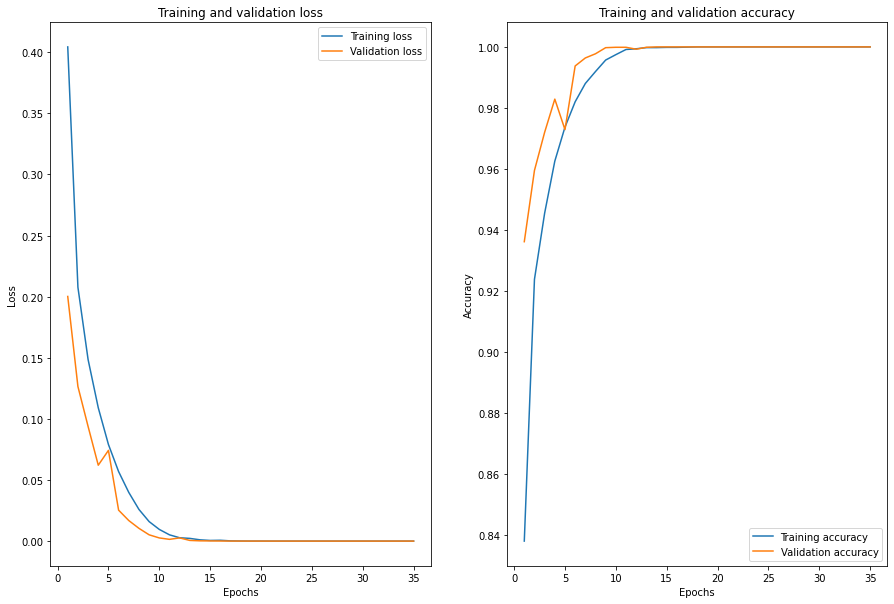

In [24]:
fig = plt.figure(figsize=(15,10
                          ))
ax= plt.subplot( 1,2,1 )
plt.plot(epochs, loss_values,label="Training loss")
plt.plot(epochs, val_loss, label = "Validation loss")
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
ax = plt.subplot(1,2,2)
plt.plot(epochs, accuracy,label="Training accuracy")
plt.plot(epochs, val_accuracy, label = "Validation accuracy")
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


In [25]:
# Model predictions of unknown data

Model_pred = model.predict(test_train)

157/157 [==============================] - 1s 4ms/step


In [26]:
Model_pred

array([[3.1608612e-15],
       [1.5547911e-08],
       [6.8956967e-21],
       ...,
       [4.4078363e-21],
       [1.0000000e+00],
       [2.8728967e-11]], dtype=float32)